# Tạo model dự đoán

In [1]:
import pandas as pd

from loaddata import data_engineered as data

In [2]:
data.head(5)

,Age,Embarked,Fare,Pclass,Sex,Survived,Title,FamilySize
PassengerId,,,,,,,,
1,22,S,7.2500,3,male,0.0,Mr,2
2,38,C,71.2833,1,female,1.0,Mrs,2
3,26,S,7.9250,3,female,1.0,Miss,1
4,35,S,53.1000,1,female,1.0,Mrs,2
5,35,S,8.0500,3,male,0.0,Mr,1


Chúng ta đã chứng minh được là những feature có hiện có có quan hệ với việc sống/chết của 1 cá nhân trên tàu Titanic. Công đoạn cuối cùng là code và train 1 Machine Learning model để dự đoán 1 người sẽ sống hay chết nếu ở trên tàu Titanic.

## Ngoài lề: Machine Learning (ML)

Định nghĩa: là ngành khoa học cho phép máy tính "học" trực tiếp từ dữ liệu thay vì được lập trình cụ thể ([Wikipedia](https://en.wikipedia.org/wiki/Machine_learning))

Tức là thay vì
```python
survival_prob = 0.5
if data['Sex'] == 'male':
    survival_prob -= 0.1  # Mấy con số này con người phải tìm, có khi cả đời không ra
if data['Pclass'] == 1:
    survival_prob += 0.25
...
prediction = 'Survive' if survival_prob > 0.5 else 'Die'
```
chỉ cần:
```python
labels = data['Survived']
features = data.drop(columns=['Survived'])
model = MachineLearningModel(some_hyper_parameters)
model.learn(features, labels)
predictions = model.predict(new_data)
# Con người không cần tìm ra cái gì cả, máy tự tìm
```

Có 3 nhánh chính trong ML:
- Supervised learning: học với data có label, mục đích là sau khi học thì, model nhận được input mới dự đoán được output tương ứng
- Unsupervised learning: học với data không có label, mục đích là nhóm các dữ liệu tương tự vào cùng nhóm
- Reinforcement learning: máy thực hiện hành động và nhận được điểm số cho hành động đó, từ đó tìm cách giải quyết bài toán với điểm số tối đa

Hiện tại dạng thường gặp nhất là supervised learning. Bài Titanic đang làm cũng thuộc dạng này.

Core của supervised learning là toán học. Data được biểu diễn dưới dạng số học, và model là 1 tập hợp các công thức toán học để biến đổi từ input -> output và từ sai số của output so với dữ liệu thực (labels) để điều chỉnh lại các trọng số được sử dụng trong các công thức trong model.

Ví dụ: bộ data có thể biểu diễn trên 1 đồ thị với `x` là feature và `y` là label. 

![data](imgs/data.png)

ML sẽ tìm 1 hàm số `f` để map feature `x` với label `y`, với sai số nhỏ nhất có thể

![learning](imgs/learning.png)

Khi mới khởi tạo, model có thể sẽ đoán ra hàm số như đường màu <font color='red'>đỏ</font>. Trong quá trình training, model có thể sẽ tìm ra hàm số màu <font color='blue'>xanh biển</font> rồi tìm đến giá trị tối ưu màu <font color='green'>xanh lá</font>.

## Convert data về dạng số

Các thư viện ML phổ biến hiện nay đã giúp đẩy phần toán xuống phía dưới và đưa ra những method để training 1 ML model trở nên rất đơn giản cho bất kỳ lập trình viên nào. Tuy nhiên lập trình viên/data scientist vẫn có nhiệm vụ là đưa data về dạng tính toán được.

Xem lại dạng data chúng ta đang có:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
Age           1309 non-null int64
Embarked      1309 non-null category
Fare          1309 non-null float64
Pclass        1309 non-null category
Sex           1309 non-null category
Survived      891 non-null float64
Title         1309 non-null category
FamilySize    1309 non-null int64
dtypes: category(4), float64(2), int64(2)
memory usage: 56.7 KB


Có 4 feature đang ở dạng `category`, có thể convert thành số rất đơn giản:

In [4]:
# Cách 1
pd.get_dummies(data)  # data chưa thay đổi do chưa gán ngược lại

,Age,Fare,Survived,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_High Standing
PassengerId,,,,,,,,,,,,,,,,,
1,22,7.2500,0.0,2,0,0,1,0,0,1,0,1,1,0,0,0,0
2,38,71.2833,1.0,2,1,0,0,1,0,0,1,0,0,1,0,0,0
3,26,7.9250,1.0,1,0,0,1,0,0,1,1,0,0,0,1,0,0
4,35,53.1000,1.0,2,0,0,1,1,0,0,1,0,0,1,0,0,0
5,35,8.0500,0.0,1,0,0,1,0,0,1,0,1,1,0,0,0,0
6,29,8.4583,0.0,1,0,1,0,0,0,1,0,1,1,0,0,0,0
7,54,51.8625,0.0,1,0,0,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,37,90.0000,NaN,2,0,1,0,1,0,0,1,0,0,1,0,0,0


In [5]:
# Cách 2
category_columns = data.select_dtypes(['category']).columns
data[category_columns].apply(lambda x: x.cat.codes)  # Data cũng chưa thay đổi

,Embarked,Pclass,Sex,Title
PassengerId,,,,
1,2,2,1,0
2,0,0,0,1
3,2,2,0,2
4,2,0,0,1
5,2,2,1,0
6,1,2,1,0
7,2,0,1,0
...,...,...,...,...
1303,1,0,0,1


Cách 1 thay 1 cột chứa `k` categories bằng `k` cột tương ứng với từng category. Cách này tốn memory hơn do cần lưu thêm hàng loạt số `0`. Cách 2 là thay trực tiếp categorical value bằng integer code tương ứng. Cách này ít tốn memory hơn, nhưng có điểm yếu là nó tạo ra mối quan hệ không mong muốn giữa các category, vd nếu `male = 1` và `female = 2` thì sẽ có mối quan hệ `female = 2 * male`.

### Ngoài lề: Pearson Correlation

Có 1 điểm đáng nhắc đến là cách 2 cho phép ta vẽ được 1 biểu đồ rất hữu ích:

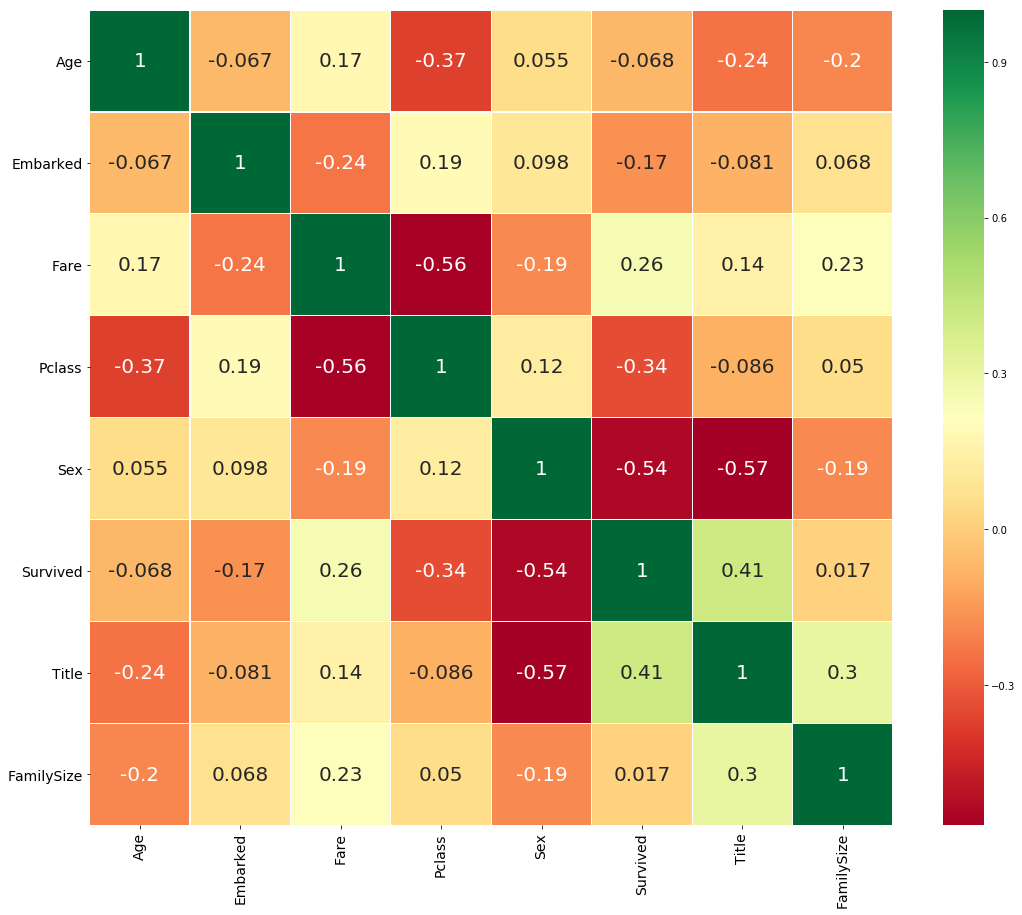

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = data.copy(deep=True)  # Tạm chưa muốn thay đổi giá trị của data
temp[category_columns] = temp[category_columns].apply(lambda x: x.cat.codes)

sns.heatmap(temp.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Đây là biểu đồ _Pearson Correlation_, thể hiện mối quan hệ giữa các feature.
- Các cặp feature có hệ số tương quan gần `-1` hoặc `1` có mối quan hệ chặt chẽ với nhau. Hay nói cách khác, 1 feature chứa rất nhiều thông tin về feature kia. Có thể xem xét để bỏ bớt 1 trong 2 để tăng tốc độ tính toán.

Có thể thấy ở đây là không có cặp feature nào quan hệ quá chặt chẽ với nhau, tức là chúng ta không có feature thừa.

Ở bài tập này số lượng feature khá nhỏ nên có thể chọn cách 1:

In [7]:
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age                    1309 non-null int64
Fare                   1309 non-null float64
Survived               891 non-null float64
FamilySize             1309 non-null int64
Embarked_C             1309 non-null uint8
Embarked_Q             1309 non-null uint8
Embarked_S             1309 non-null uint8
Pclass_1               1309 non-null uint8
Pclass_2               1309 non-null uint8
Pclass_3               1309 non-null uint8
Sex_female             1309 non-null uint8
Sex_male               1309 non-null uint8
Title_Mr               1309 non-null uint8
Title_Mrs              1309 non-null uint8
Title_Miss             1309 non-null uint8
Title_Master           1309 non-null uint8
Title_High Standing    1309 non-null uint8
dtypes: float64(2), int64(2), uint8(13)
memory usage: 67.8 KB


### Quiz

Tại sao không biến đổi trực tiếp từ data ban đầu thành dạng số mà lại đưa về thành `category` trước?

In [8]:
# %load solutions/quiz_answer.py
# Trong quá trình feature engineering, data visualization nên để data dưới dạng có ý nghĩa với con người
# Chỉ chuyển về dạng số khi kết thúc phần việc của người và chuyển sang việc của máy

## Dựng model

Như đã nói ở trên, sau khi đưa data về dạng phù hợp cho các thư viện ML thì việc tạo model và dự đoán trở nên vô cùng đơn giản. Ở đây ta sẽ dùng 1 loạt các thuật toán khác nhau:
- Logistic Regression
- Linear Support Vector Machines
- Random Forest
- K-Nearest Neighbours
- Naive Bayes
- Decision Tree

__Disclaimer__: Bản thân mình chưa biết hết các thuật toán này. Tuy nhiên code quá đơn giản nên cứ cho vào để so sánh

In [9]:
# Importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm  # Support vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier

# Some helper methods
from sklearn import metrics
from sklearn.model_selection import train_test_split

/home/nghiatt4/anaconda3/envs/cv36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Bộ dữ liệu hiện tại đang chứa cả training data (có label `Survived`) và test data (`Survived = null`). Cần phải tách riêng 2 bộ ra như ban đầu

In [10]:
data_train = data[pd.notnull(data['Survived'])]
data_test = data[pd.isnull(data['Survived'])]
print(data_train.index)
print(data_test.index)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)
Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)


Bộ training data lại cần chia ra làm 2 phần: 1 phần để train và 1 phần để kiểm tra độ chính xác.
Thay vì lấy theo thứ tự, nên chọn ngẫu nhiên để đảm bảo training data không bị lệch trên 1 feature nào.

In [11]:
train, test = train_test_split(data_train, test_size=0.2, random_state=201, stratify=data_train['Survived'])

Cuối cùng là tách riêng feature và label ra, vì thư viện `sklearn` expect như vậy.

In [12]:
train_X = train.drop(columns='Survived')
train_Y = train[['Survived']].values.ravel()  # Chuyển từ vector cột thành 1d array cho sklearn khỏi kêu ca
test_X = test.drop(columns='Survived')
test_Y = test[['Survived']]

Chuẩn bị 1 loạt các model sẽ dùng:

In [13]:
models = [
    LogisticRegression(),
    svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
]

Training time!

In [14]:
results = []
for model in models:
    model.fit(train_X, train_Y)
    predictions = model.predict(test_X)
    results.append(metrics.accuracy_score(predictions, test_Y))

model_names = [
    'Logistic Regression',
    'SVM',
    'Random Forest',
    'KNN',
    'Naive Bayes',
    'Decision Tree',
]
pd.DataFrame({ 'Accuracy': results }, index=model_names)

,Accuracy
Logistic Regression,0.837989
SVM,0.787709
Random Forest,0.854749
KNN,0.720670
Naive Bayes,0.793296
Decision Tree,0.821229


Do data test được chia random, nên độ chính xác ở đây chỉ mang tính tương đối. Có thể chạy nhiều lần, thống kê lại và lấy trung bình để có được con số chính xác hơn.